#### Importing Libraries


In [1]:
import pandas as pd 
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import style
from mpl_toolkits.basemap import Basemap

import seaborn as sns
import os

import geopandas as gpd

In [2]:
conda install basemap-data-hires

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


#### Data Loading

In [3]:
ab_data = pd.read_csv("AB_NYC_2019.csv")

#### Data Exploartion

In [4]:
ab_data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [5]:
ab_data.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

In [6]:
ab_data.sample(5)

id                                               name    host_id  \
47043  35570396                          Big Room (up to 3 people)  166984137   
24505  19713885                       The Historic Jackson Heights  137575707   
35865  28467737      Midtown Manhattan - 3BR/1BA near Empire State   27661888   
37076  29481874  Large, comfortable, one-bedroom Astoria apartment   20310357   
35941  28548195         Modern, clean, NEW apt 1 block from train!  179413160   

            host_name neighbourhood_group     neighbourhood  latitude  \
47043     Piergiorgio           Manhattan            Harlem  40.81290   
24505           Lilia              Queens   Jackson Heights  40.75091   
35865            Inho           Manhattan       Murray Hill  40.74734   
37076            Kira              Queens  Ditmars Steinway  40.77489   
35941  Maria Fernanda            Brooklyn     Cypress Hills  40.67974   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
47043  -73.94391     Private room     90               5                  0   
24505  -73.89304     Private room     62               2                 55   
35865  -73.98049  Entire home/apt    575               2                 40   
37076  -73.91610     Private room    170               1                  0   
35941  -73.88374     Private room     45               1                  8   

      last_review  reviews_per_month  calculated_host_listings_count  \
47043         NaN                NaN                               1   
24505  2019-06-11               2.31                               1   
35865  2019-07-07               4.43                               1   
37076         NaN                NaN                               1   
35941  2019-07-05               0.85                               1   

       availability_365  
47043               193  
24505               318  
35865                46  
37076               157  
35941                57

In [7]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
ab_data.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [9]:
print(ab_data.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [10]:
ab_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Data Cleaning and Preprocessing

In [11]:
nan_df = ab_data[ab_data.isna().any(axis=1)]
nan_df.head()

id                                               name  host_id  \
2    3647                THE VILLAGE OF HARLEM....NEW YORK !     4632   
19   7750                  Huge 2 BR Upper East  Cental Park    17985   
26   8700  Magnifique Suite au N de Manhattan - vue Cloitres    26394   
36  11452                        Clean and Quiet in Brooklyn     7355   
38  11943                          Country space in the city    45445   

          host_name neighbourhood_group       neighbourhood  latitude  \
2         Elisabeth           Manhattan              Harlem  40.80902   
19             Sing           Manhattan         East Harlem  40.79685   
26  Claude & Sophie           Manhattan              Inwood  40.86754   
36               Vt            Brooklyn  Bedford-Stuyvesant  40.68876   
38          Harriet            Brooklyn            Flatbush  40.63702   

    longitude        room_type  price  minimum_nights  number_of_reviews  \
2   -73.94190     Private room    150               3                  0   
19  -73.94872  Entire home/apt    190               7                  0   
26  -73.92639     Private room     80               4                  0   
36  -73.94312     Private room     35              60                  0   
38  -73.96327     Private room    150               1                  0   

   last_review  reviews_per_month  calculated_host_listings_count  \
2          NaN                NaN                               1   
19         NaN                NaN                               2   
26         NaN                NaN                               1   
36         NaN                NaN                               1   
38         NaN                NaN                               1   

    availability_365  
2                365  
19               249  
26                 0  
36               365  
38               365

In [12]:
nv_data = ab_data.dropna(axis = 0, how ='any') 
nv_data = nv_data[nv_data['price'] != 0]

print("Old data frame length:", len(ab_data))
print("New data frame length:", len(nv_data))

nv_data.head()

Old data frame length: 48895
New data frame length: 38811


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   
5        Chris           Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   
5  Entire home/apt    200               3                 74  2019-06-22   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
3               4.64                               1               194  
4               0.10                               1                 0  
5               0.59                               1               129

In [13]:
# New Data Name = nv_data

In [14]:
nv_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38811 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38811 non-null  int64  
 1   name                            38811 non-null  object 
 2   host_id                         38811 non-null  int64  
 3   host_name                       38811 non-null  object 
 4   neighbourhood_group             38811 non-null  object 
 5   neighbourhood                   38811 non-null  object 
 6   latitude                        38811 non-null  float64
 7   longitude                       38811 non-null  float64
 8   room_type                       38811 non-null  object 
 9   price                           38811 non-null  int64  
 10  minimum_nights                  38811 non-null  int64  
 11  number_of_reviews               38811 non-null  int64  
 12  last_review                     

In [15]:
ab_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [16]:
nv_data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [17]:
# Converting Data to Appropriate Datatypes

In [18]:
pd.options.display.float_format = "{:.2f}".format
nv_data.describe()

id      host_id  latitude  longitude    price  minimum_nights  \
count    38811.00     38811.00  38811.00   38811.00 38811.00        38811.00   
mean  18100180.87  64246109.39     40.73     -73.95   142.37            5.87   
std   10695023.16  75903711.36      0.05       0.05   197.01           17.39   
min       2539.00      2438.00     40.51     -74.24    10.00            1.00   
25%    8720894.00   7028184.50     40.69     -73.98    69.00            1.00   
50%   18871734.00  28370925.00     40.72     -73.95   101.00            2.00   
75%   27569981.00 101887237.50     40.76     -73.94   170.00            4.00   
max   36455809.00 273841667.00     40.91     -73.71 10000.00         1250.00   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count           38811.00           38811.00                        38811.00   
mean               29.29               1.37                            5.17   
std                48.18               1.68                           26.31   
min                 1.00               0.01                            1.00   
25%                 3.00               0.19                            1.00   
50%                 9.00               0.72                            1.00   
75%                33.00               2.02                            2.00   
max               629.00              58.50                          327.00   

       availability_365  
count          38811.00  
mean             114.88  
std              129.54  
min                0.00  
25%                0.00  
50%               55.00  
75%              229.00  
max              365.00

In [19]:
# name of cities and type of rooms

In [20]:
feab_col = []
for column in nv_data.columns:
    if len(nv_data[column].unique()) <= 10:
        print("===============================================================================")
        print(f"{column} : {nv_data[column].unique()}")
        feab_col.append(column)

neighbourhood_group : ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
room_type : ['Private room' 'Entire home/apt' 'Shared room']


In [21]:
# Removing 'id' and 'hostnames' Columns as they are ineffective

In [22]:
nv_data.drop(["id", "host_name"], axis="columns", inplace=True)
nv_data.head()

name  host_id  \
0                Clean & quiet apt home by the park     2787   
1                             Skylit Midtown Castle     2845   
3                   Cozy Entire Floor of Brownstone     4869   
4  Entire Apt: Spacious Studio/Loft by central park     7192   
5         Large Cozy 1 BR Apartment In Midtown East     7322   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington     40.65     -73.97     Private room   
1           Manhattan       Midtown     40.75     -73.98  Entire home/apt   
3            Brooklyn  Clinton Hill     40.69     -73.96  Entire home/apt   
4           Manhattan   East Harlem     40.80     -73.94  Entire home/apt   
5           Manhattan   Murray Hill     40.75     -73.97  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   
3     89               1                270  2019-07-05               4.64   
4     80              10                  9  2018-11-19               0.10   
5    200               3                 74  2019-06-22               0.59   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
3                               1               194  
4                               1                 0  
5                               1               129

In [23]:
nv_data.last_review.isnull().sum()

0

#### Data Visualization

In [24]:
# Importing Worldmap

In [25]:
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='c')

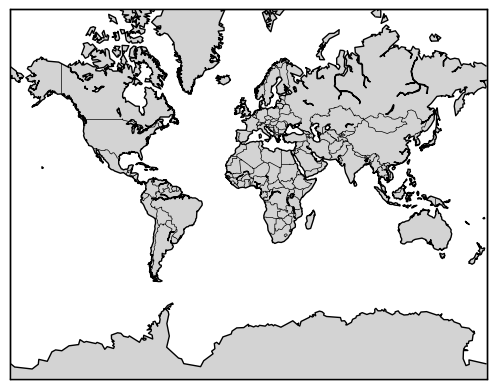

In [26]:
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='white')
m.drawmapboundary(fill_color='white')

In [27]:
# Plotting Datapoints on Map

In [28]:
latitudes, longitudes = nv_data['latitude'], nv_data['longitude']

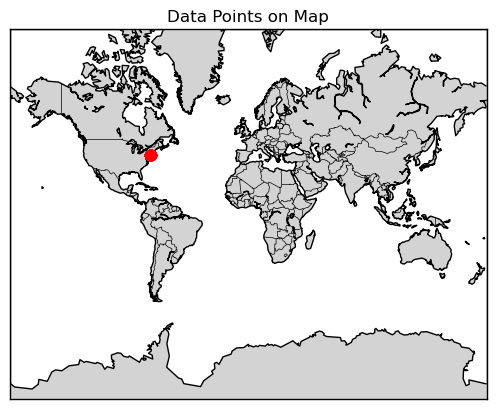

In [29]:
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='c')

m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='white')
m.drawmapboundary(fill_color='white')

# Convert latitudes and longitudes to map coordinates
x, y = m(longitudes, latitudes)

m.scatter(x, y, marker='o', color='red', s=50, zorder=10)

plt.title("Data Points on Map")
plt.show()

In [30]:
# Focusing on New York Map
# As we are analysing Data from New York

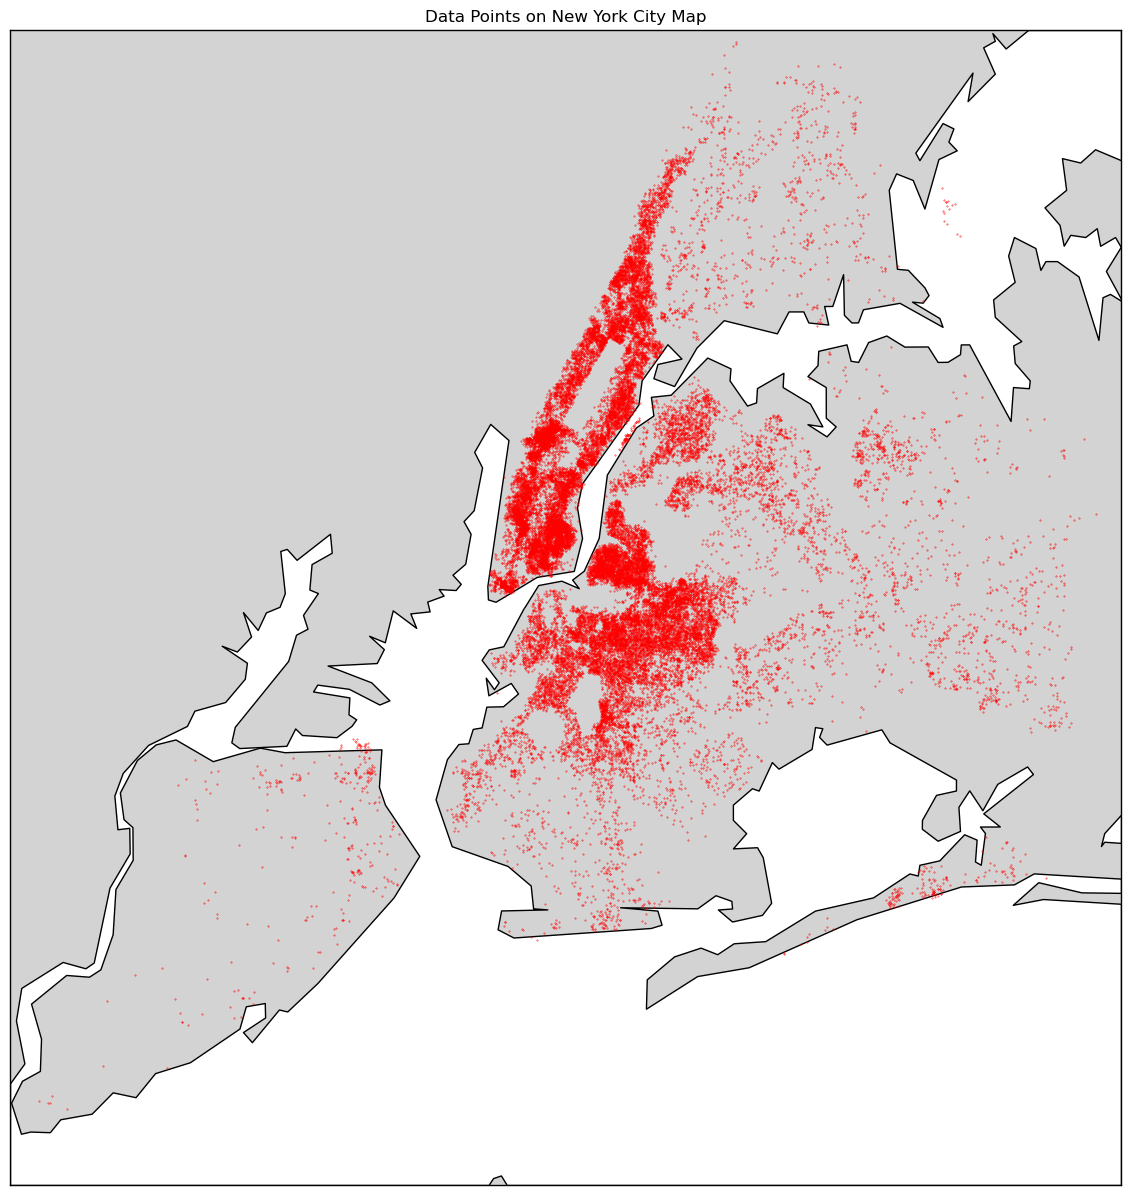

In [31]:
m = Basemap(projection='merc', llcrnrlat=40.4774, urcrnrlat=40.9176, llcrnrlon=-74.2591, urcrnrlon=-73.7004, resolution='h')

plt.figure(figsize=(25, 15))

m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='white')
m.drawmapboundary(fill_color='white')

x, y = m(longitudes, latitudes)

m.scatter(x, y, marker='o', color='red', s=0.1, zorder=25)

plt.title("Data Points on New York City Map")
plt.show()

In [32]:
# Differentiating Cities

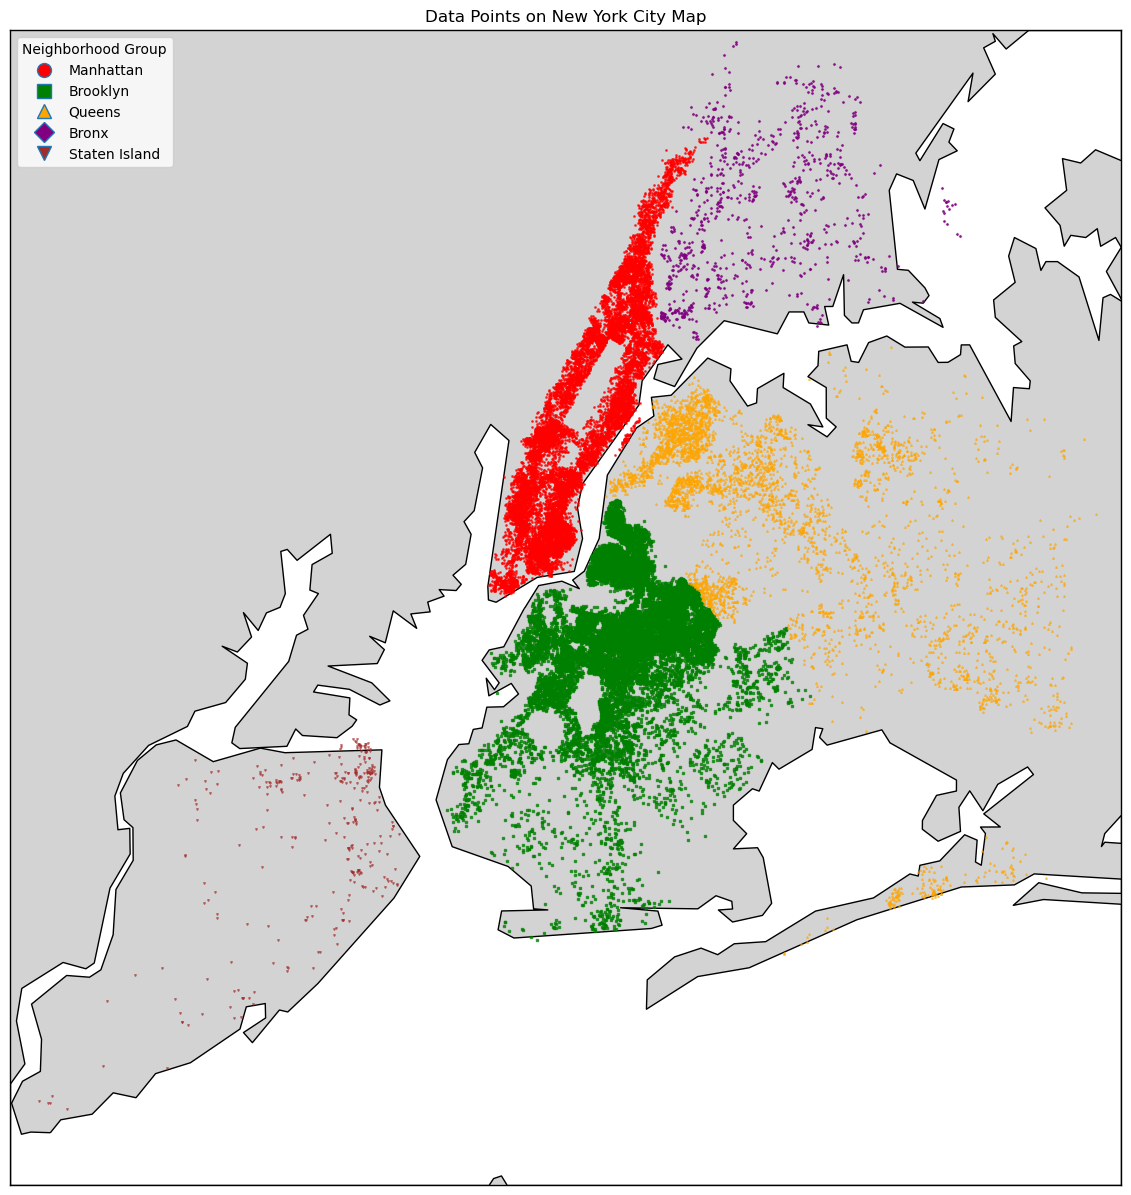

In [33]:
latitudes = nv_data['latitude']
longitudes = nv_data['longitude']
neighborhood_groups = nv_data['neighbourhood_group']

m = Basemap(projection='merc', llcrnrlat=40.4774, urcrnrlat=40.9176, llcrnrlon=-74.2591, urcrnrlon=-73.7004, resolution='h')

plt.figure(figsize=(25, 15))

m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='white')
m.drawmapboundary(fill_color='white')

group_markers = {
    'Manhattan': 'o',
    'Brooklyn': 's',
    'Queens': '^',
    'Bronx': 'D',
    'Staten Island': 'v',
}

group_colors = {
    'Manhattan': 'red',
    'Brooklyn': 'green',
    'Queens': 'orange',
    'Bronx': 'purple',
    'Staten Island': 'brown',
}

for group, group_data in nv_data.groupby('neighbourhood_group'):
    x, y = m(group_data['longitude'], group_data['latitude'])
    m.scatter(x, y, marker=group_markers[group], color=group_colors[group], label=group, alpha=0.7, s=1, zorder=25)
    
proxies = [plt.Line2D([0], [0], linestyle='none', marker=group_markers[group], markersize=10, markerfacecolor=group_colors[group]) for group in group_markers]

plt.legend(proxies, group_markers.keys(),loc='upper left', title='Neighborhood Group')

plt.title("Data Points on New York City Map")
plt.show()

In [34]:
# Pricing Analysis

In [35]:
# Most Expensive AirBnb in each City 
most_expensive_idx = nv_data.groupby('neighbourhood_group')['price'].idxmax()

most_expensive_listings = nv_data.loc[most_expensive_idx]

print(most_expensive_listings[['neighbourhood_group', 'neighbourhood', 'price']])

      neighbourhood_group neighbourhood  price
25422               Bronx     Riverdale    800
17692            Brooklyn    Greenpoint  10000
6530            Manhattan   East Harlem   9999
9151               Queens       Astoria  10000
1621        Staten Island      Arrochar    625


In [36]:
# Most Expensive AirBnb in NYC
most_expensive_idx = nv_data['price'].idxmax()

most_expensive_property_code = nv_data.loc[most_expensive_idx, 'name']
most_expensive_property_price = nv_data.loc[most_expensive_idx, 'price']
most_expensive_property_city = nv_data.loc[most_expensive_idx, 'neighbourhood_group'] 
most_expensive_property_area = nv_data.loc[most_expensive_idx, 'neighbourhood'] 

print("Most Expensive Property:", most_expensive_property_code)
print("City:", most_expensive_property_city)
print("Area:", most_expensive_property_area)
print("Price:", most_expensive_property_price)

Most Expensive Property: Furnished room in Astoria apartment
City: Queens
Area: Astoria
Price: 10000


In [37]:
# Least Expensive AirBnb in NYC
least_expensive_idx = nv_data['price'].idxmin()

least_expensive_property_code = nv_data.loc[least_expensive_idx, 'name']
least_expensive_property_price = nv_data.loc[least_expensive_idx, 'price']
least_expensive_property_city = nv_data.loc[least_expensive_idx, 'neighbourhood_group'] 
least_expensive_property_area = nv_data.loc[least_expensive_idx, 'neighbourhood'] 

print("Least Expensive Property :", least_expensive_property_code)
print("City:", least_expensive_property_city)
print("Area:", least_expensive_property_area)
print("Price:", least_expensive_property_price)

Least Expensive Property : Jen Apt
City: Manhattan
Area: SoHo
Price: 10


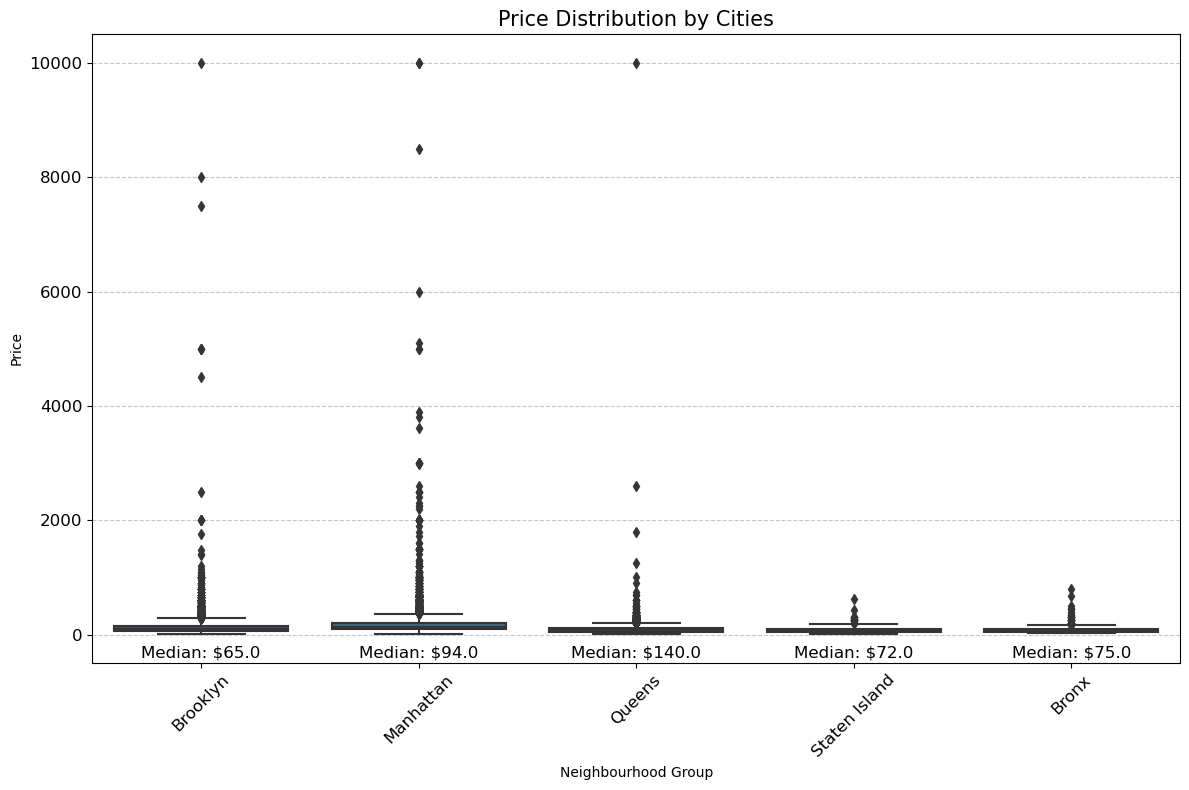

In [38]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood_group', y='price', data=nv_data, palette='viridis')
plt.title('Price Distribution by Cities', fontsize=15)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.yticks(fontsize=12)

plt.xticks(rotation=45, fontsize=12)

medians = nv_data.groupby('neighbourhood_group')['price'].median()
for i, label in enumerate(medians.index):
    median_price = medians[label]
    plt.text(i, -200, f"Median: ${median_price}", ha='center', va='top', fontsize=12)
    
plt.tight_layout() 

plt.show()

In [39]:
# Neighbourhood Price Comparison

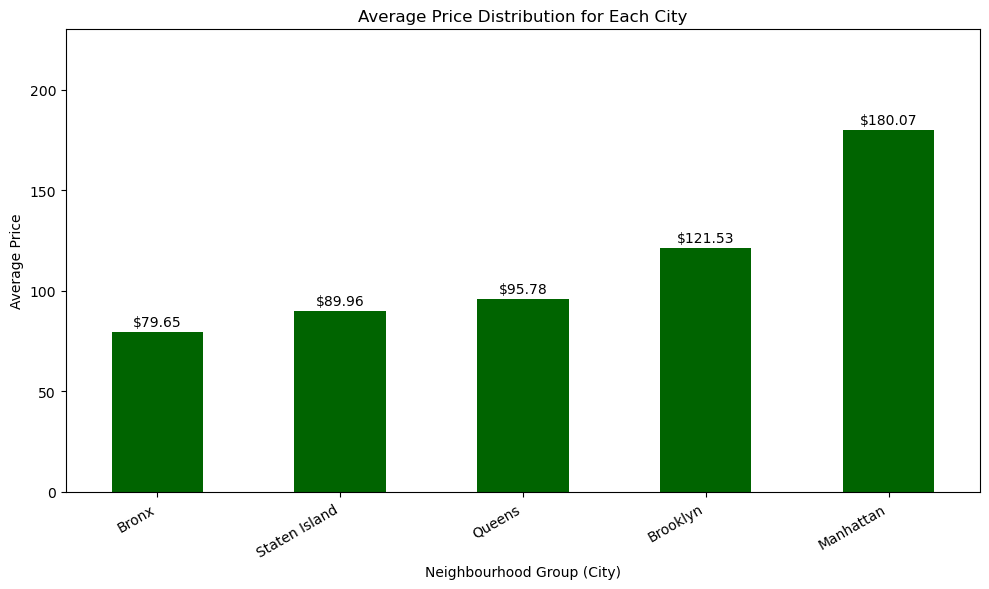

In [40]:
average_prices = nv_data.groupby('neighbourhood_group')['price'].mean()

average_prices_sorted = average_prices.sort_values()

plt.figure(figsize=(10, 6))
ax = average_prices_sorted.plot(kind='bar', color='darkgreen')
plt.xlabel('Neighbourhood Group (City)')
plt.ylabel('Average Price')
plt.title('Average Price Distribution for Each City')
plt.xticks(rotation=30, ha='right')

plt.ylim(0, max(average_prices_sorted) + 50)

for i, v in enumerate(average_prices_sorted):
    ax.text(i, v + 3, f"${v:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [41]:
# Room Type Comparison

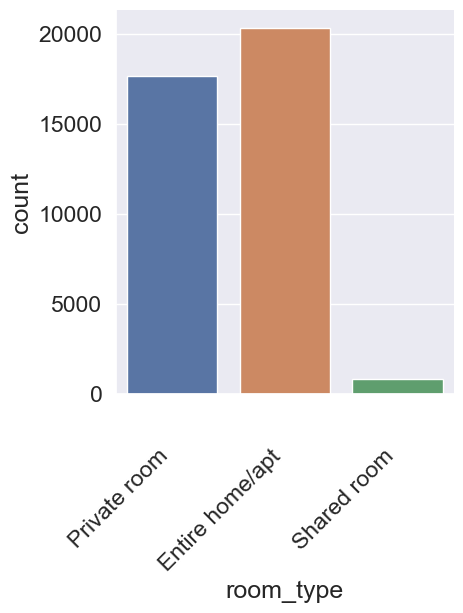

In [42]:
sns.set(font_scale=1.5)

g = sns.catplot(x="room_type", data=nv_data, kind="count", height=5)

ax = g.ax

ax.set_xticklabels(ax.get_xticklabels(), ha="right", va="top", y=-0.1)

plt.xticks(rotation=45)

plt.show()

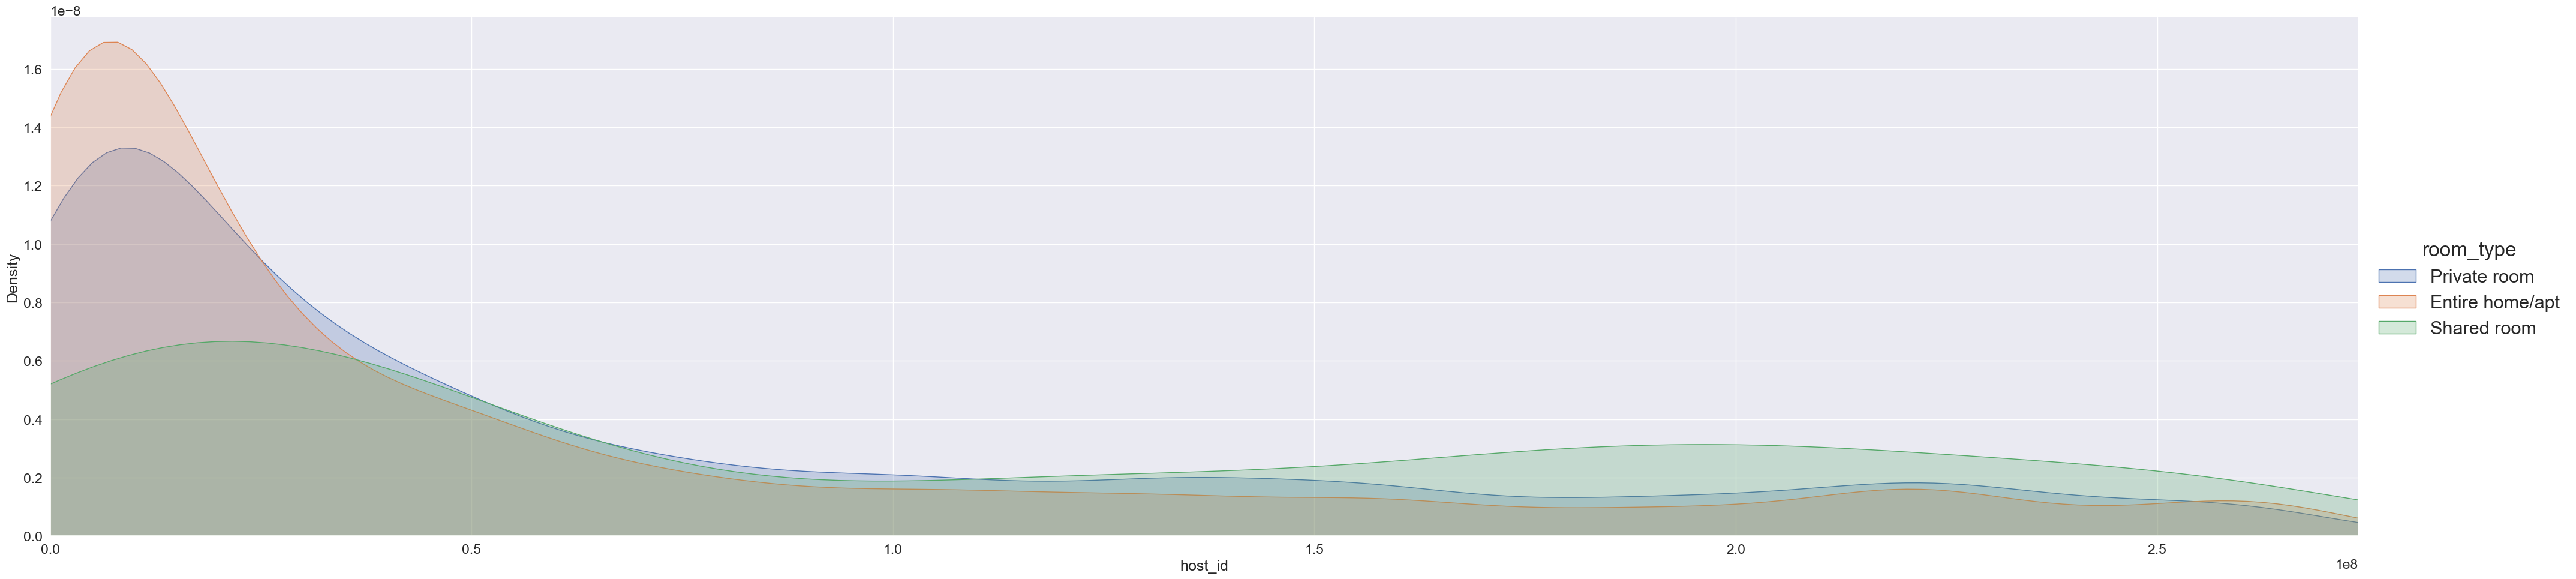

In [43]:
fig = sns.FacetGrid(nv_data, hue="room_type", aspect=4, height=10)

fig.map(sns.kdeplot, 'host_id', fill=True)

oldest = nv_data['host_id'].max()
fig.set(xlim=(0, oldest))

sns.set(font_scale=2)

fig.add_legend()

plt.show()

In [44]:
# Popularity Analysis 

<Figure size 1500x3000 with 0 Axes>

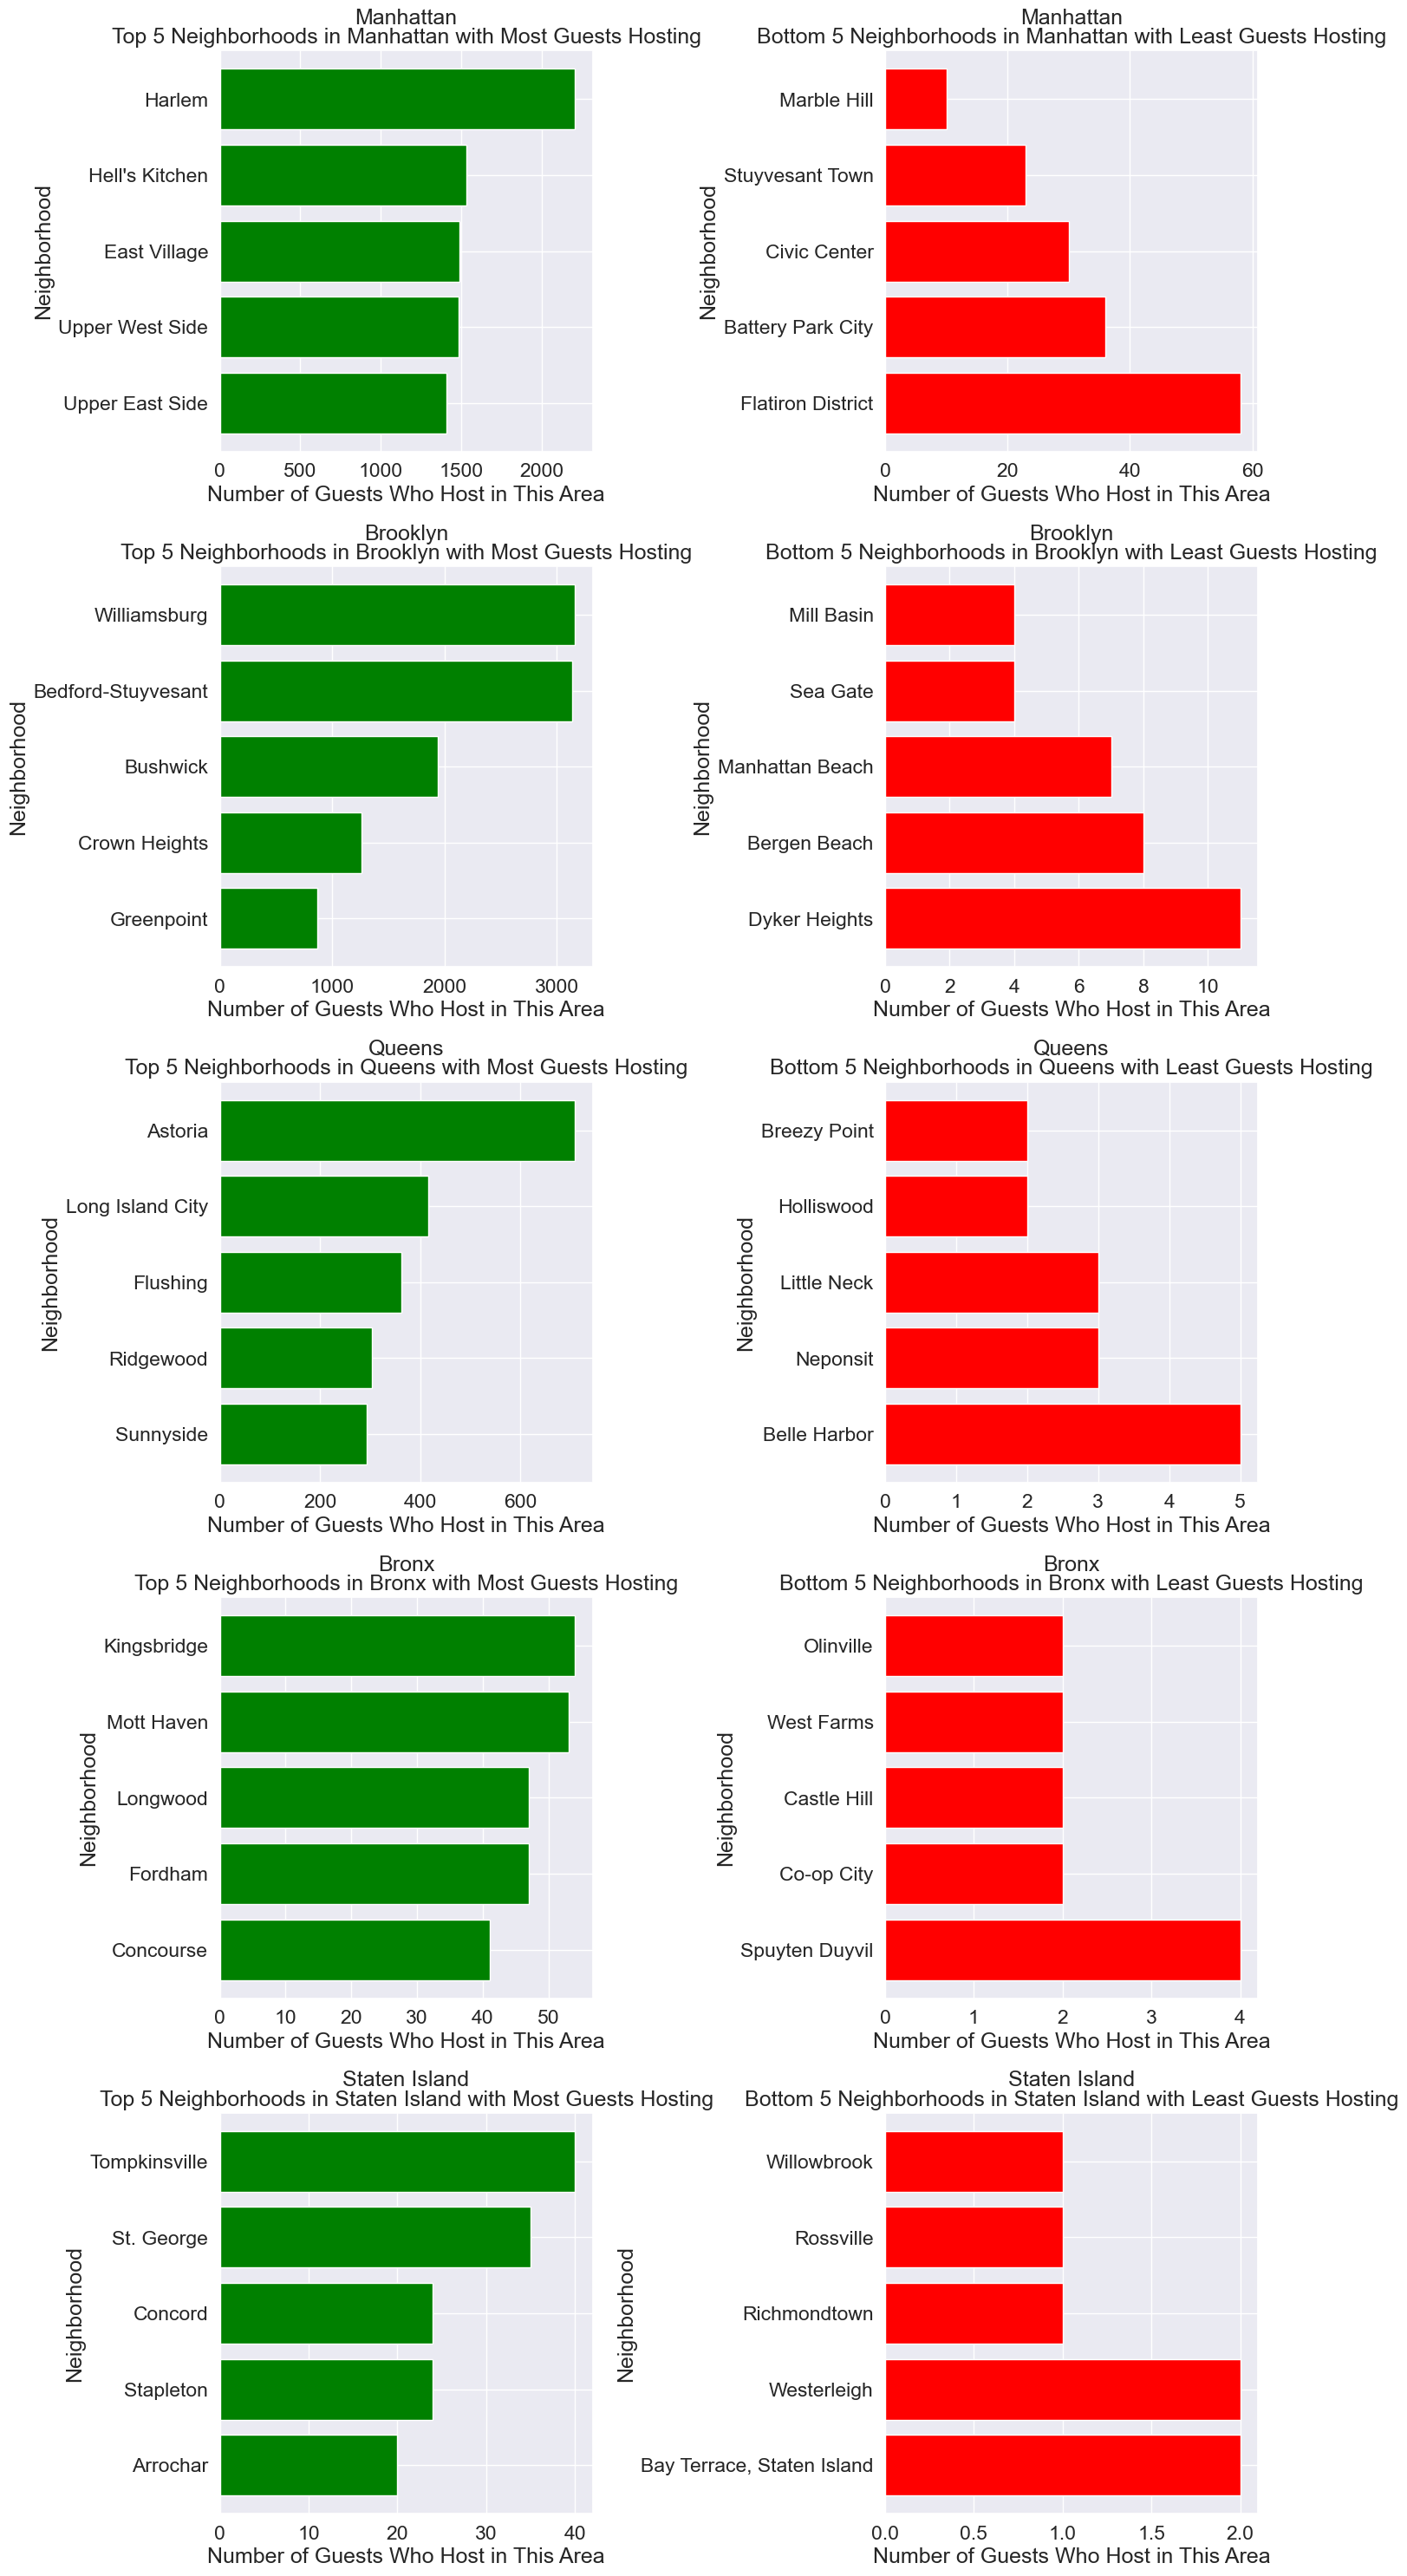

In [45]:
plt.figure(figsize=(15, 30))

sns.set(font_scale=1.5)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))

cities = ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]

for i, city in enumerate(cities):
 
    city_data = nv_data[nv_data['neighbourhood_group'] == city]

    top_5_neighborhoods = city_data['neighbourhood'].value_counts().nlargest(5).sort_values()

    ax_top = axes[i, 0]
    ax_top.barh(top_5_neighborhoods.index, top_5_neighborhoods.values, color='green')
    ax_top.set_title(f"Top 5 Neighborhoods in {city} with Most Guests Hosting")
    ax_top.set_xlabel("Number of Guests Who Host in This Area")
    ax_top.set_ylabel("Neighborhood")

    bottom_5_neighborhoods = city_data['neighbourhood'].value_counts().nsmallest(5).sort_values(ascending=False)

    ax_bottom = axes[i, 1]
    ax_bottom.barh(bottom_5_neighborhoods.index, bottom_5_neighborhoods.values, color='red')
    ax_bottom.set_title(f"Bottom 5 Neighborhoods in {city} with Least Guests Hosting")
    ax_bottom.set_xlabel("Number of Guests Who Host in This Area")
    ax_bottom.set_ylabel("Neighborhood")

    ax_top.text(0.5, 1.08, city, ha='center', va='center', transform=ax_top.transAxes)
    
    ax_bottom.text(0.5, 1.08, city, ha='center', va='center', transform=ax_bottom.transAxes)

if len(cities) < 5:
    for i in range(len(cities), 5):
        fig.delaxes(axes.flatten()[i * 2])
        fig.delaxes(axes.flatten()[i * 2 + 1])

plt.tight_layout()

plt.show()

In [46]:
# state wise popularity comparison 

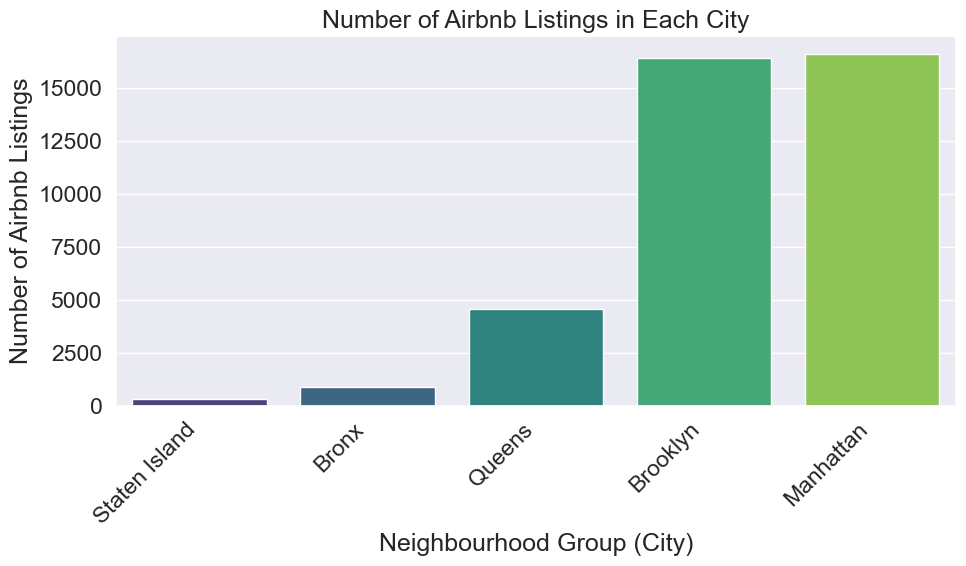

In [47]:
listing_counts = nv_data['neighbourhood_group'].value_counts()

listing_counts_sorted = listing_counts.sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=listing_counts_sorted.index, y=listing_counts_sorted.values, palette='viridis')
plt.xlabel('Neighbourhood Group (City)')
plt.ylabel('Number of Airbnb Listings')
plt.title('Number of Airbnb Listings in Each City')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [48]:
# Pricewise Room Comparison

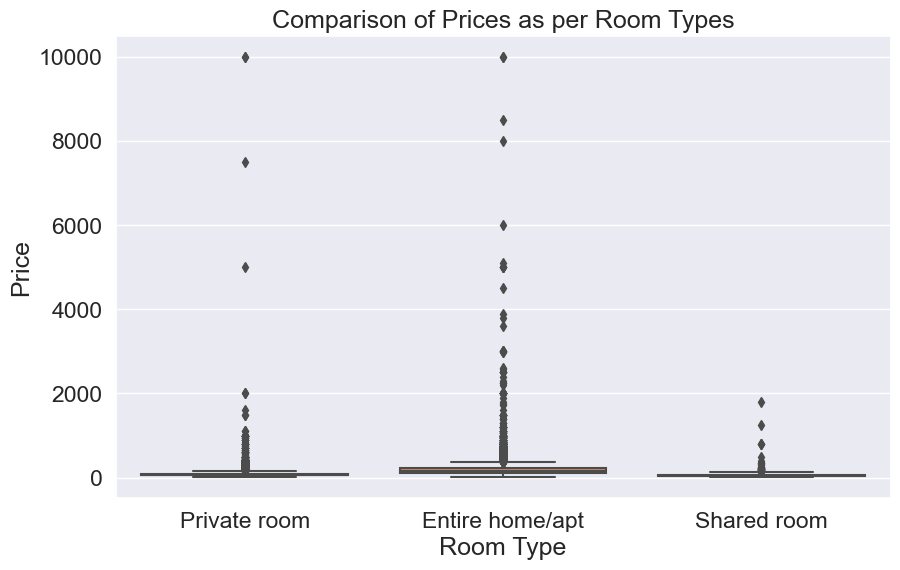

In [49]:
sns.set(font_scale=1.5)

plt.figure(figsize=(10, 6))
sns.boxplot(x="room_type", y="price", data=nv_data)
plt.title("Comparison of Prices as per Room Types")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()

In [50]:
# Availaibility city wise for whole map

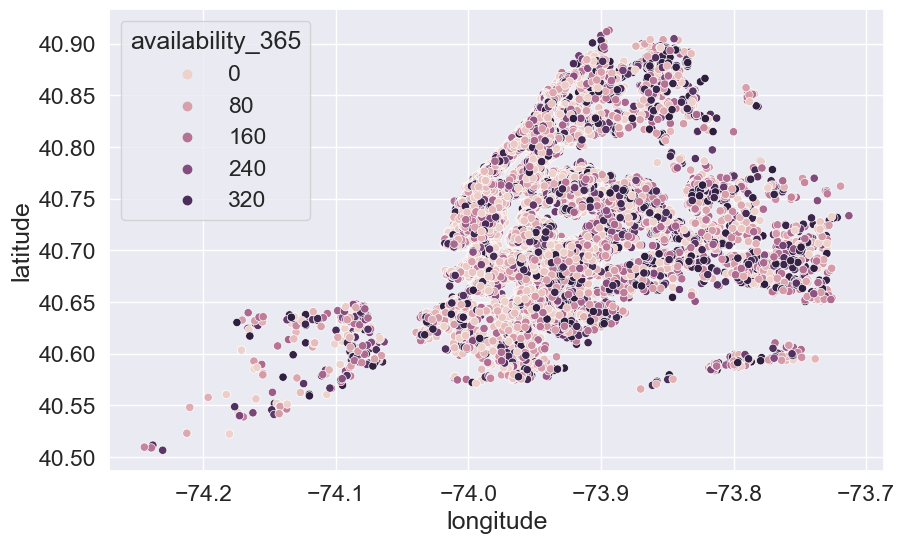

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='availability_365', data=nv_data)
plt.ioff()
plt.show()

<Figure size 1500x1500 with 0 Axes>

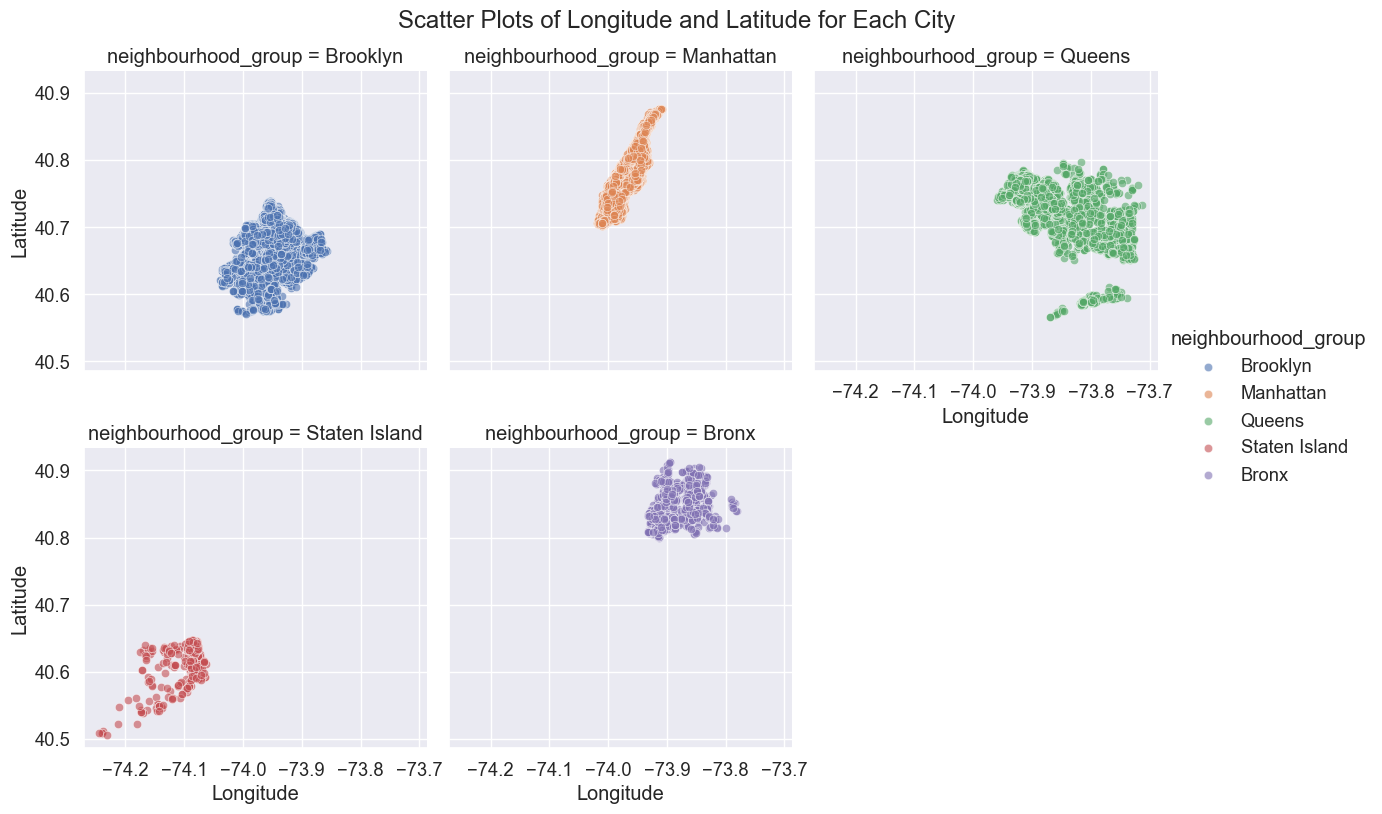

In [52]:
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.2)

g = sns.FacetGrid(nv_data, col="neighbourhood_group", col_wrap=3, height=4, hue="neighbourhood_group")
g.map(sns.scatterplot, "longitude", "latitude", alpha=0.6)
g.add_legend()

g.set_axis_labels("Longitude", "Latitude")
g.fig.suptitle("Scatter Plots of Longitude and Latitude for Each City", y=1.02)

plt.show()

#### Data Analysis

In [53]:
# Pairplot

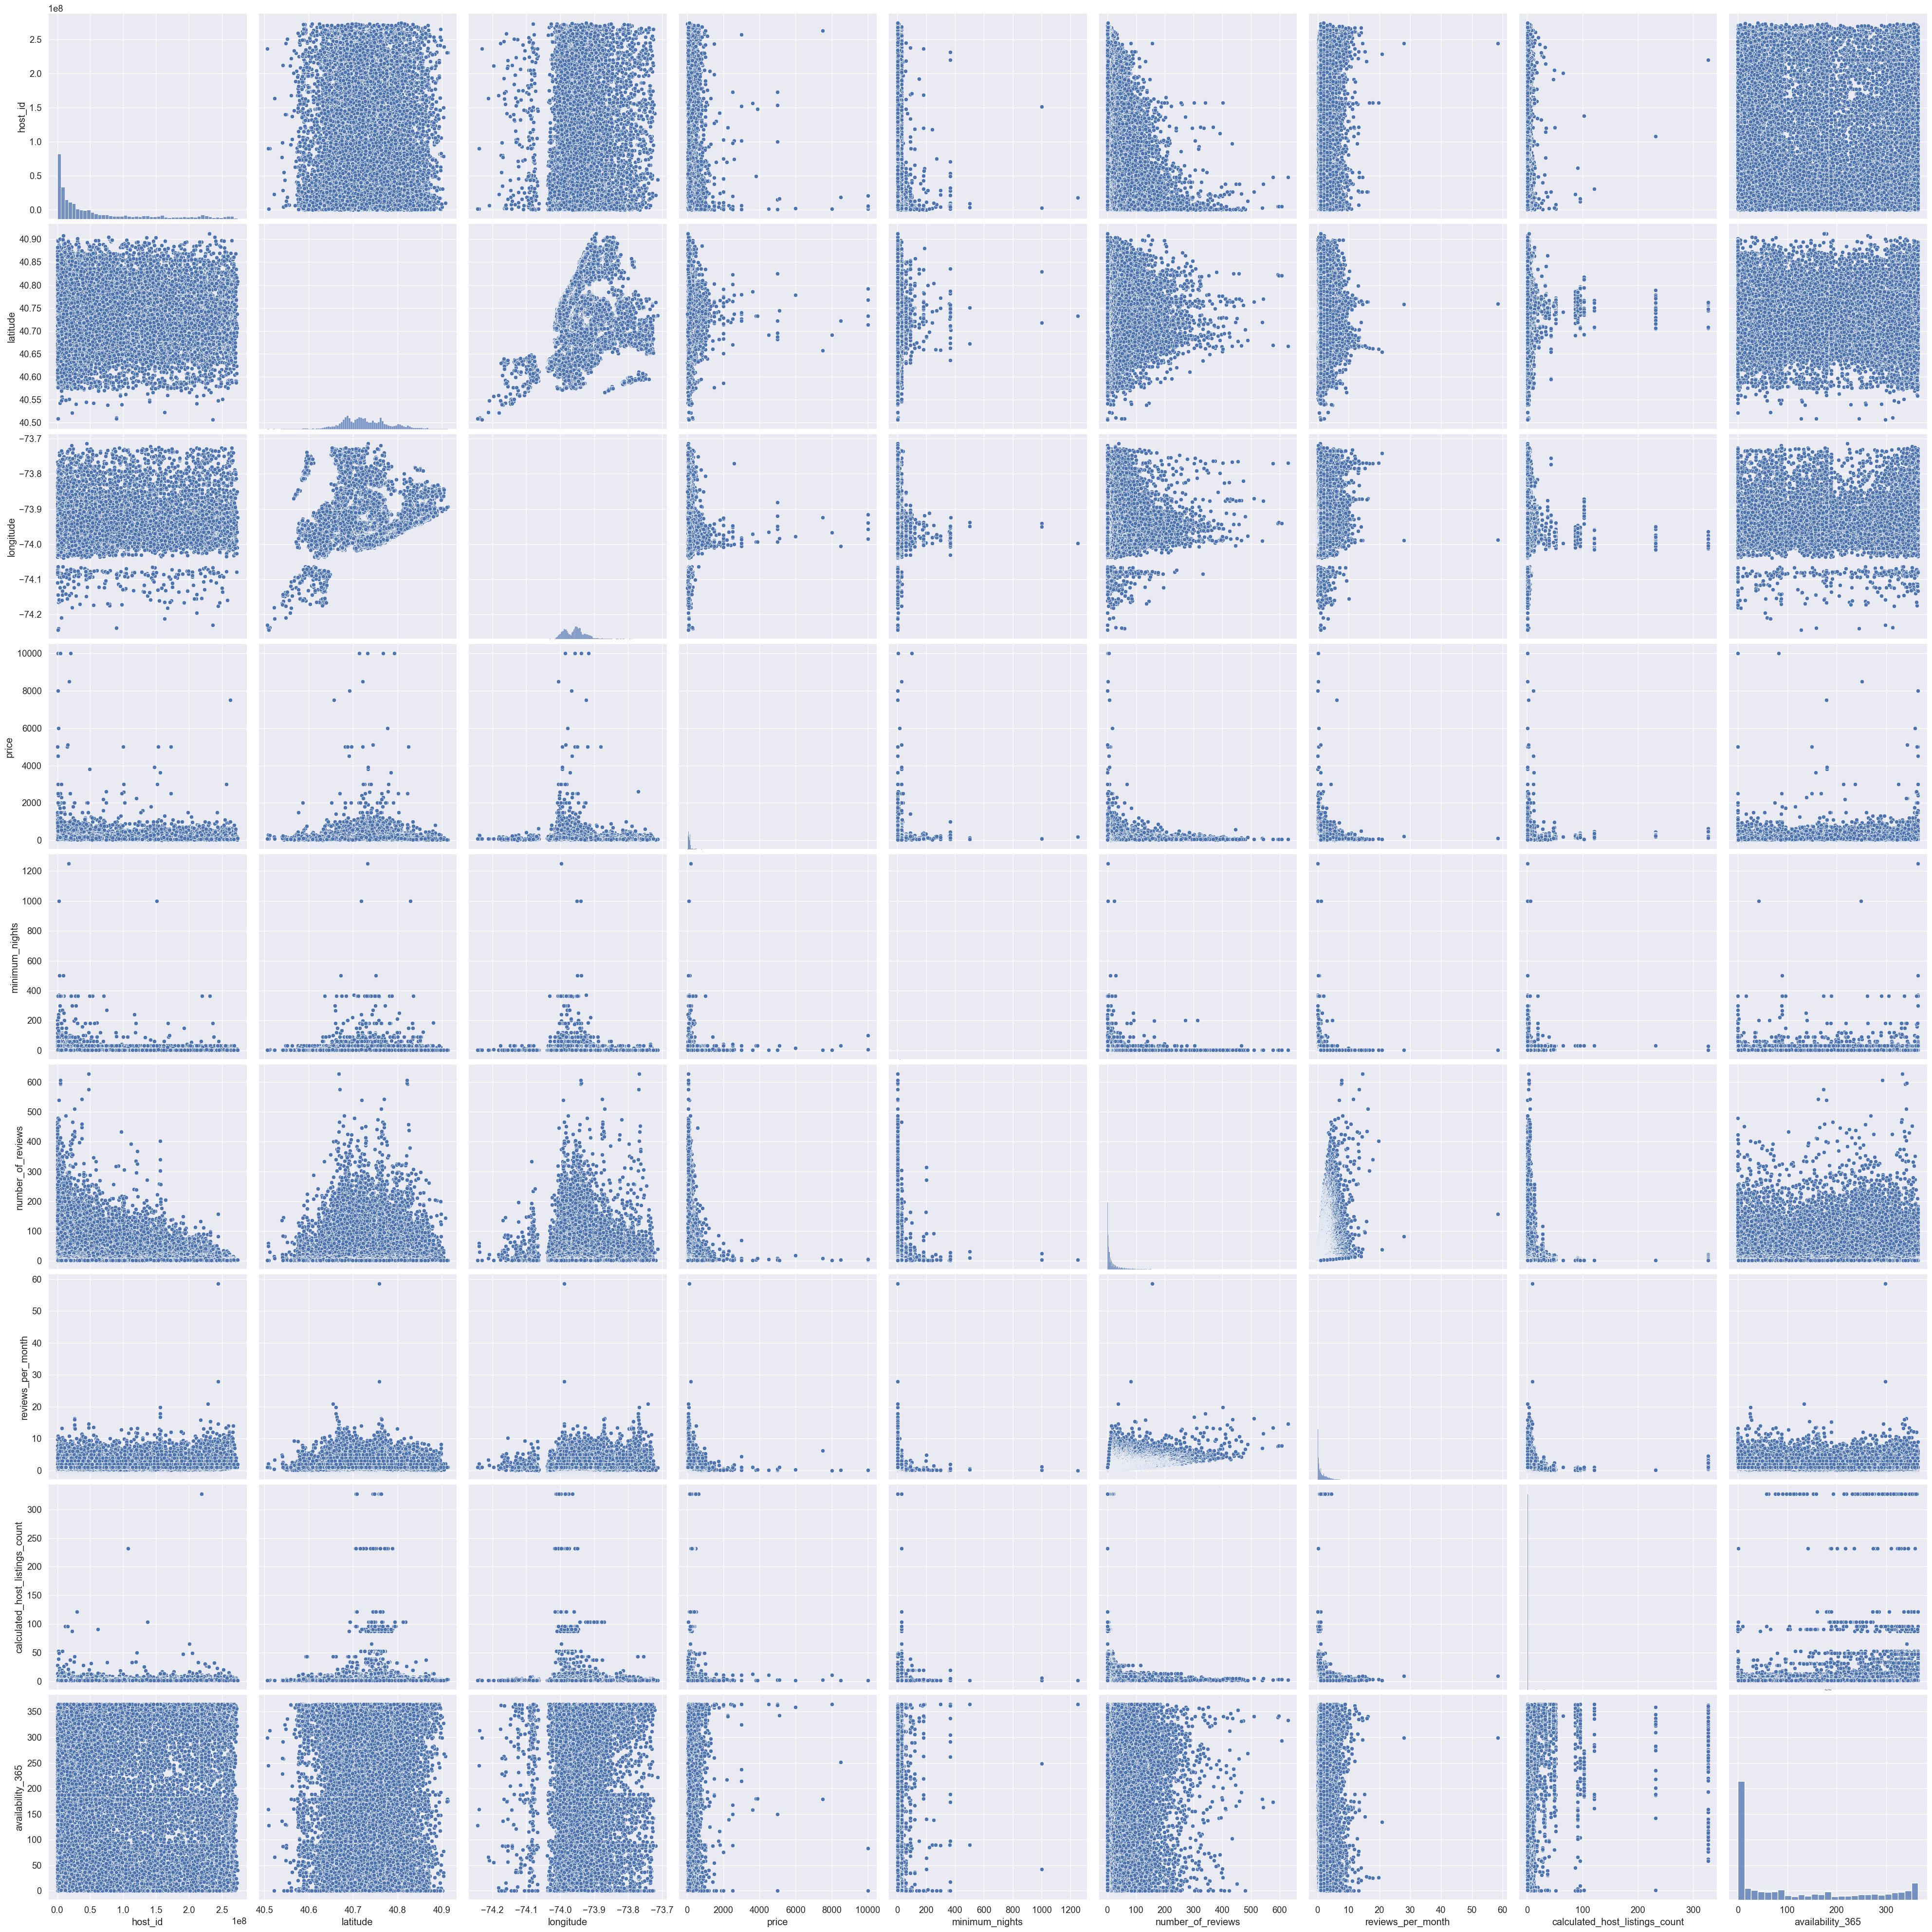

In [54]:
sns.pairplot(nv_data, height=4.5)
plt.title('Pair Plot', fontsize=2.5)
plt.show()

In [55]:
# Correlation Matrix

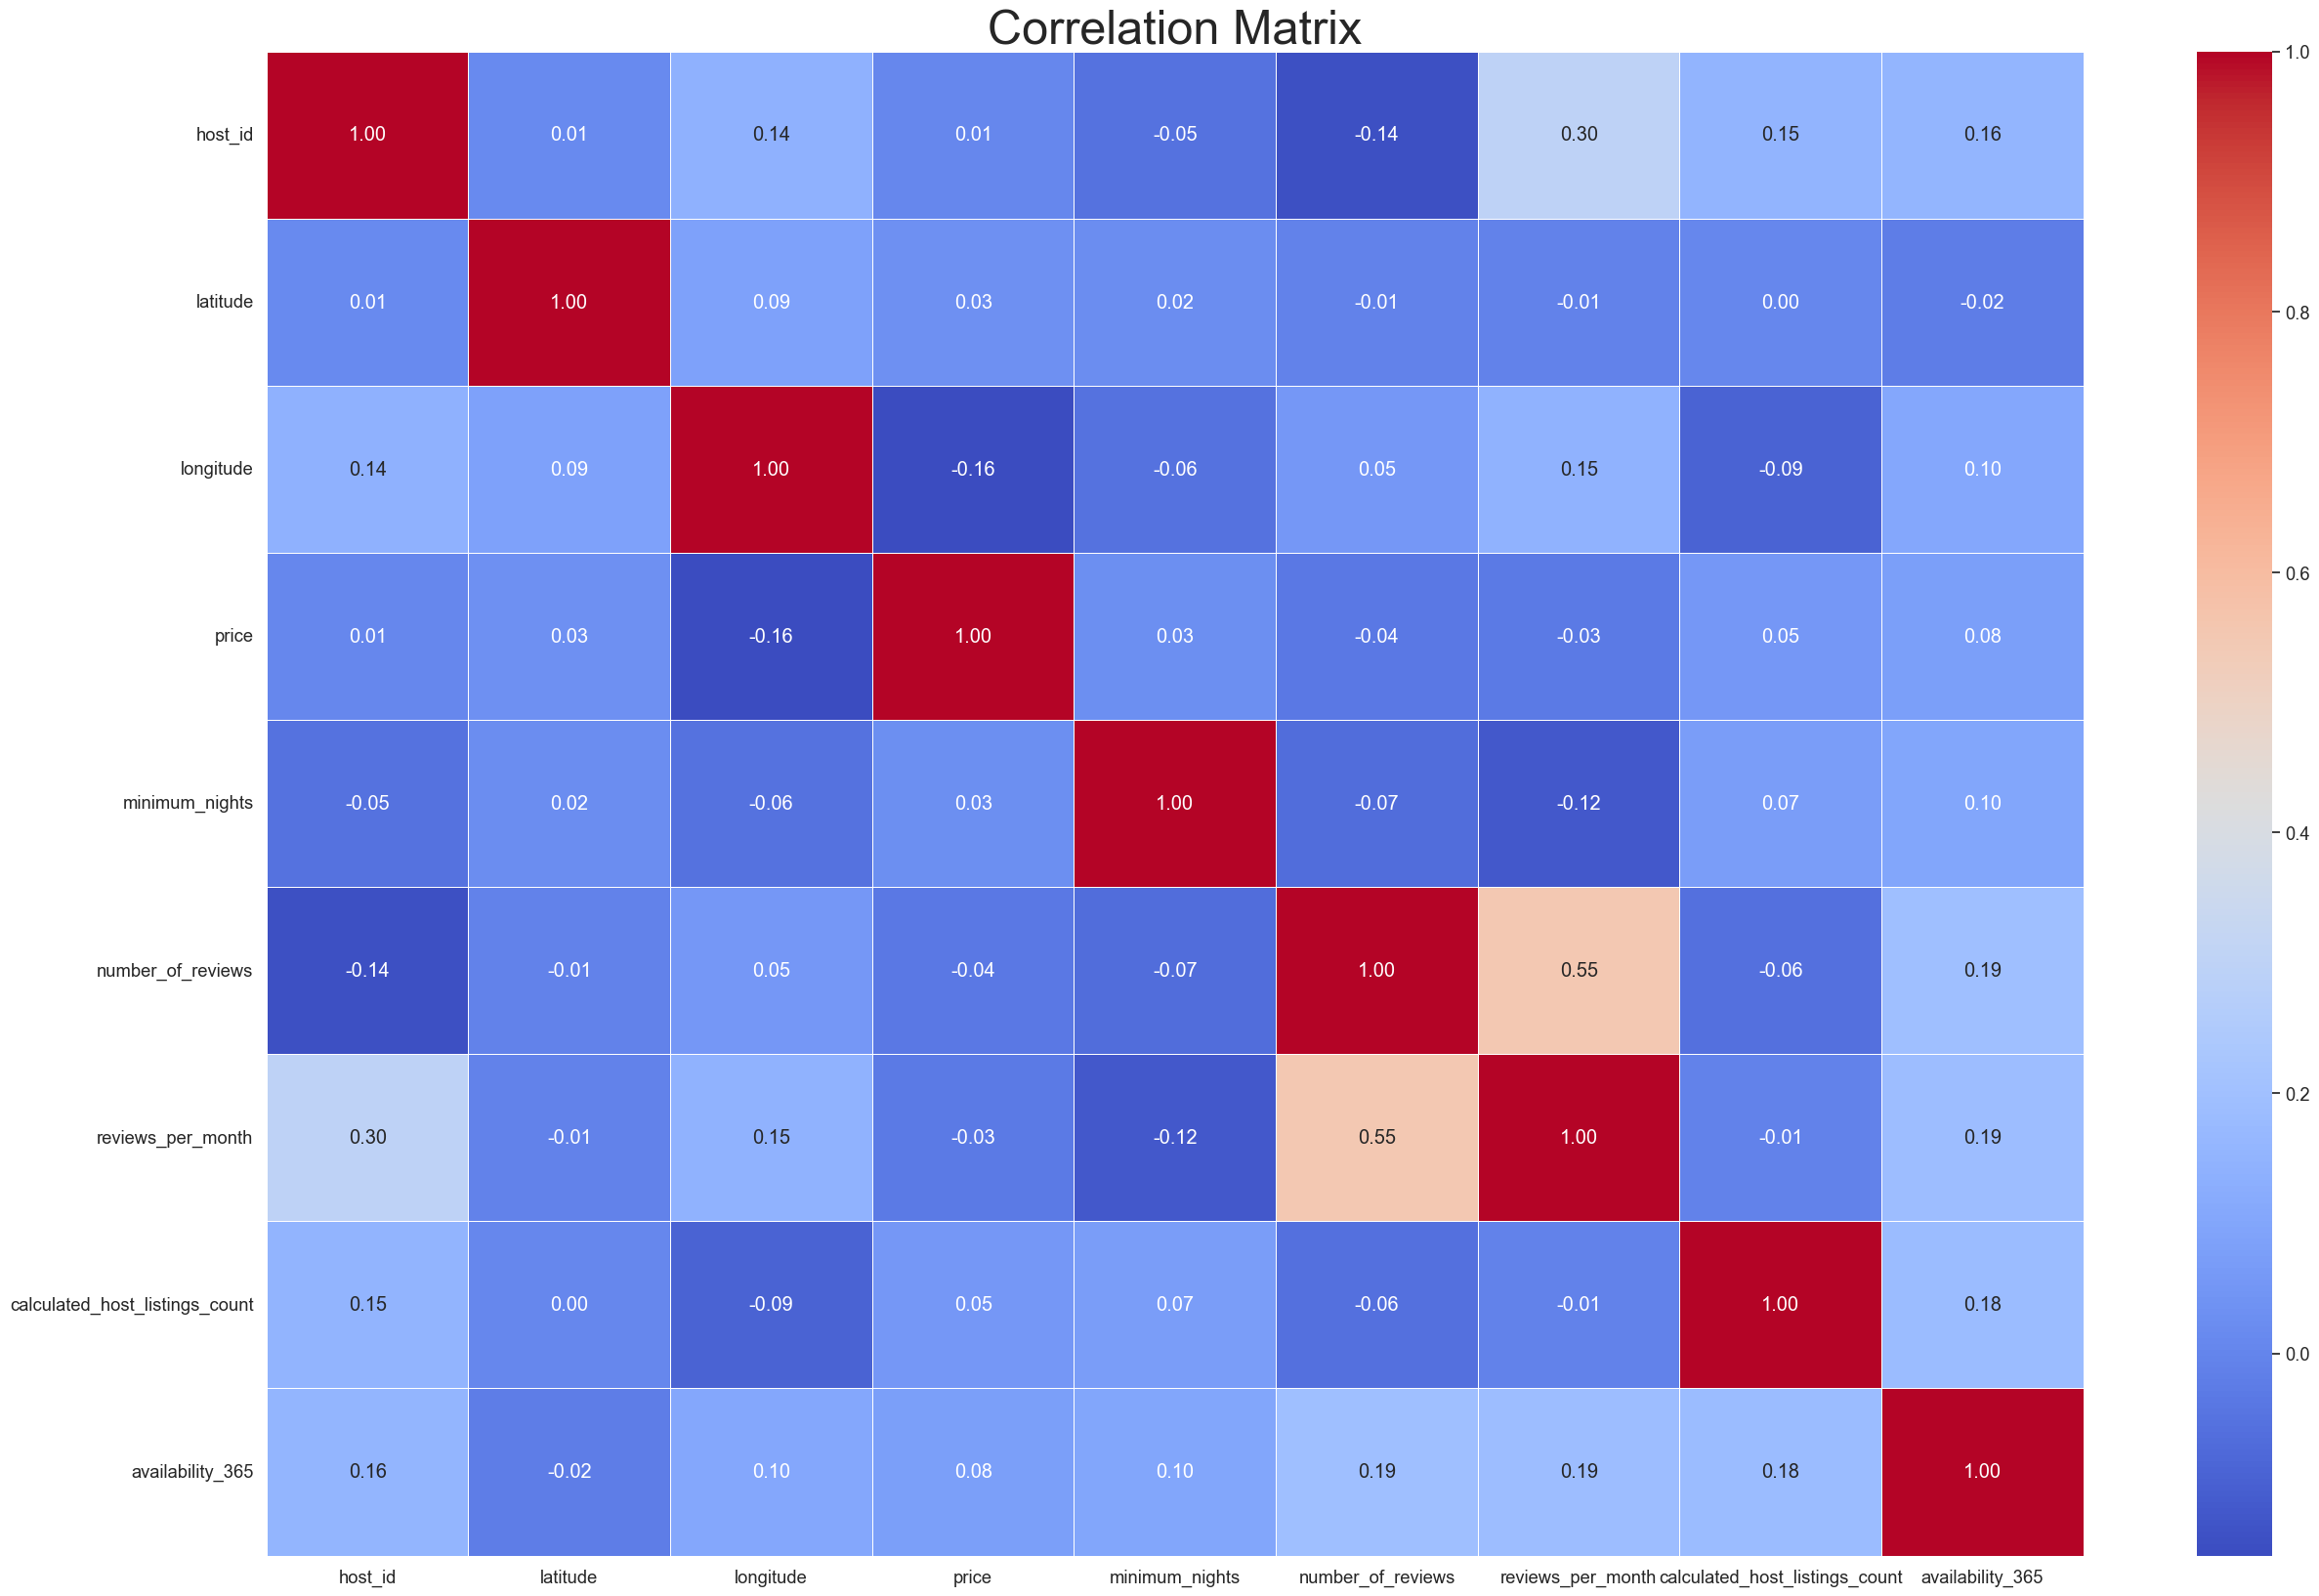

In [56]:
correlation_matrix = nv_data.corr(numeric_only=True)

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=35)
plt.show()